In [1]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
np.random.seed(42)

In [3]:
def f(x):
    """
    :param x: np.array(np.float) вектор длины 2
    :return: np.float
    """
    return np.sum(np.sin(x)**2)

In [57]:
def grad_f(x): 
    """
    Градиент функциии f, определенной выше.
    :param x: np.array[2]: float вектор длины 2
    :return: np.array[2]: float вектор длины 2
    """
    return np.sin(2*x)

In [58]:
assert np.allclose(grad_f(np.array([1, 2])), 
                   np.array([0.90929743, -0.7568025])), "Что-то не так!" 

In [59]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: градиент функции f (вектор размерности 2)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array[num_iter, 2] пар вида (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)

    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []

    # итерация цикла -- шаг градиентнго спуска
    curr_x = x0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
        grad = grad_f(curr_x)
        curr_x -= grad * lr

    return np.vstack(history)

In [60]:
steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

In [61]:
steps

array([[8.32442641e-01, 2.12339111e-01, 5.91389415e-01],
       [7.32884951e-01, 1.71136350e-01, 4.76586118e-01],
       [6.33435972e-01, 1.37573467e-01, 3.69173842e-01],
       [5.38019032e-01, 1.10404632e-01, 2.74730279e-01],
       [4.50010680e-01, 8.85027013e-02, 1.97015681e-01],
       [3.71676661e-01, 7.08944454e-02, 1.36915955e-01],
       [3.04000617e-01, 5.67630175e-02, 9.28228774e-02],
       [2.46877814e-01, 4.54347840e-02, 6.17833273e-02],
       [1.99484186e-01, 3.63603276e-02, 4.05903718e-02],
       [1.60637392e-01, 2.90946699e-02, 2.64294398e-02],
       [1.29059755e-01, 2.32790192e-02, 1.71059615e-02],
       [1.03533474e-01, 1.86248972e-02, 1.10277812e-02],
       [8.29744344e-02, 1.49007791e-02, 7.09098809e-03],
       [6.64556106e-02, 1.19210644e-02, 4.55195567e-03],
       [5.32035861e-02, 9.53707740e-03, 2.91890486e-03],
       [4.25829374e-02, 7.62977758e-03, 1.87042317e-03],
       [3.40766416e-02, 6.10388128e-03, 1.19802500e-03],
       [2.72665881e-02, 4.88313

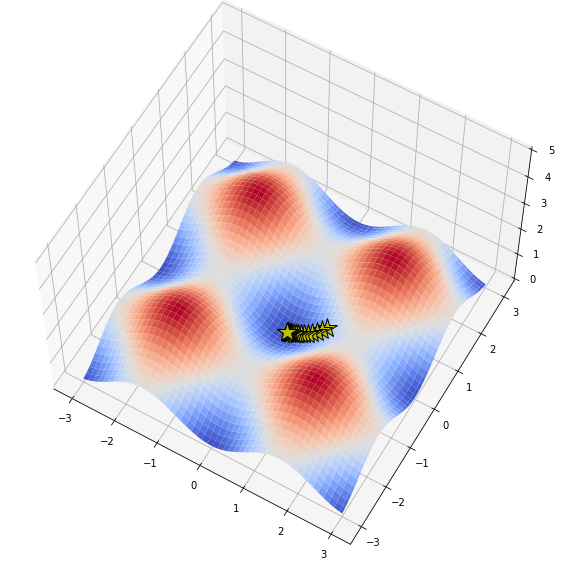

In [62]:
# %matplotlib osx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

zs = np.array([f(np.array([x,y]))
              for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)


ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=20, zorder=3, 
        markerfacecolor='y', lw=3, c='black')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

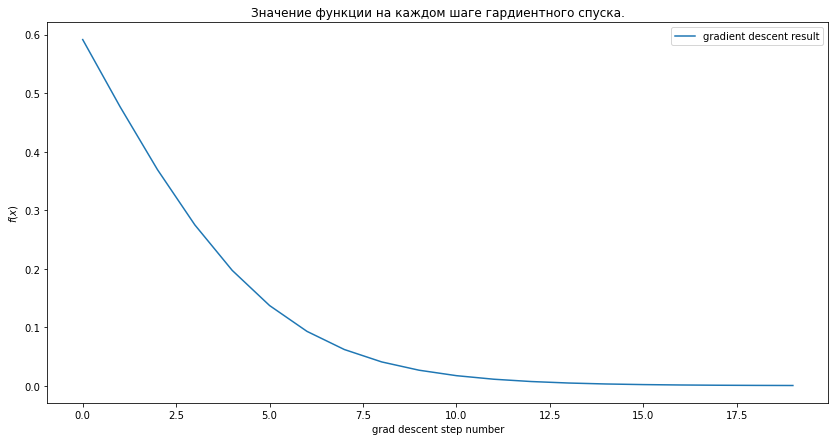

In [63]:
plt.figure(figsize=(14,7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге гардиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()

In [64]:
def generate_batches(X, y, batch_size):
    """
    param X: np.array[n_objects, n_features] --- матрица объекты-признаки
    param y: np.array[n_objects] --- вектор целевых переменных
    """
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    for i in np.arange(len(X)//batch_size):
        ind = perm[i * batch_size : (i + 1) * batch_size]
        yield X[ind], y[ind]

In [65]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

X_reconstructed, y_reconstructed = [], []
for X_batch, y_batch in generate_batches(X_fake, y_fake, 10):
    X_reconstructed.append(X_batch)
    y_reconstructed.append(y_batch)

X_reconstructed = np.concatenate(X_reconstructed)
y_reconstructed = np.concatenate(y_reconstructed)

assert (X_fake != X_reconstructed).all(), "Что-то не так!"
assert (y_fake != y_reconstructed).all(), "Что-то не так!"

assert (np.sort(X_reconstructed, axis=0) == X_fake).all(), "Что-то не так!"

In [66]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

num_batches = 0
for X_batch, y_batch in generate_batches(X_fake, y_fake, 7):
    num_batches += 1

assert num_batches == len(X_fake) // 7, "Что-то не так!"

In [ ]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

class MyElasticLogisticRegression(object):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.w = None
    
    def fit(self, X, y, epochs=10, lr=0.1, batch_size=100):
        n, k = X.shape        
        if self.w is None:
            np.random.seed(42)
            # Вектор столбец в качестве весов
            self.w = np.random.randn(k + 1)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        losses = []

        # Положите в лист losses лосс на каждом батче. Не нужно усреднять лосс по эпохе.

        for i in range(epochs):
            for X_batch, y_batch in generate_batches(X_train, y, batch_size):
                #YOUR CODE: вычислите loss на текущем батче 
                losses.append(<YOUR CODE>)
                
                #YOUR CODE: обновите self.w по формуле градиентного спуска

        return losses
    
    def get_grad(self, X_batch, y_batch, predictions):
        """
        Принимает на вход X_batch с уже добавленной колонкой единиц. 
        Выдаёт градиент функции потерь в логистической регрессии с регуляризаторами
        как сумму градиентов функции потерь на всех объектах батча + регуляризационное слагаемое
        ВНИМАНИЕ! Нулевая координата вектора весов -- это BIAS, а не вес признака. 
        Bias в регуляризационные слагаемые не входит. Также не нужно ДЕЛИТЬ ГРАДИЕНТ НА РАЗМЕР БАТЧА:
        нас интересует не среднее, а сумма. 

        Выход -- вектор-столбец градиентов для каждого веса (np.array[n_features + 1])
        """


        grad_basic = #YOUR CODE: компонент градиента из логрегрессии (см. видео 2.4 Григория Лелейтнера)
        grad_l2 = #YOUR CODE: компонент градиента из l_2-регуляризации (не забудьте обнулить компоненту с bias)

        grad_l1 = #YOUR CODE: компонент градиента из l_1-регуляризации (не забудьте обнулить компоненту с bias)
        
        return grad_basic + grad_l1 + grad_l2
        
    def predict_proba(self, X):
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def _predict_proba_internal(self, X): 
        """
        Возможно, вы захотите использовать эту функцию вместо predict_proba, поскольку
        predict_proba конкатенирует вход с вектором из единиц, что не всегда удобно
        для внутренней логики вашей программы
        """
        return sigmoid(logit(X, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self.w.copy() 
        # copy тут используется неспроста. Если copy не использовать, то get_weights()
        # выдаст ссылку на объект, а, значит, модифицируя результат применения функции
        # get_weights(), вы модифицируете и веса self.w. Если вы хотите модифицировать веса, 
        # (например, в fit), используйте self.w
      
    def __loss(self, y, p):  
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))